hello everyone!!

> In this notebook i have tried to analyse covid19 dataset and predict the number of cases for upcoming months.i have used **fbprophet model** for forecasting.
> this model produces a  straightforward, reasonable, accurate and customised forecast many datasets.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as mpl
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from fbprophet import Prophet
from plotly.subplots import make_subplots



In [2]:
# data1 = pd.read_csv('covid19 (2).csv')
data1 = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')


In [3]:
data1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
import copy
data2 = data1.copy()

In [5]:
data2.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
d = data1['Date'].value_counts().sort_index()

In [8]:
print(d.index[0])
# this is the straing date in dataset

2020-01-22


In [9]:
print(d.index[-1])
# this is the ending date in dataset

2020-07-27


In [10]:
data1['Active'] = data1['Confirmed']-data1['Deaths']-data1['Recovered']

In [11]:
# VISUALIZATION
mpl.style.use(['ggplot']) 
# for ggplot-like style

In [12]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2['Date'] = data2['Date'].dt.strftime('%m/%d/%Y')
data2 = data2.fillna('-')
fig = px.density_mapbox(data2, lat='Lat', lon='Long', z='Confirmed', radius=20,zoom=1, hover_data=["Country/Region",'Province/State',"Confirmed"],mapbox_style="carto-positron", animation_frame = 'Date', range_color= [0, 2000],title='Spread of Covid-19')
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

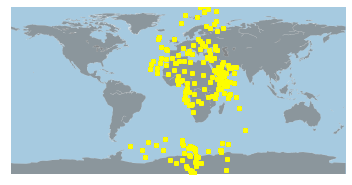

In [13]:
m=Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
# m = Basemap(llcrnrlon=-10.5,llcrnrlat=33,urcrnrlon=10.,urcrnrlat=46., resolution='i', projection='cass', lat_0 = 39.5, lon_0 = 0.)

m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a marker per city of the data frame!
m.plot(data1['Lat'], data1['Long'], linestyle='none', marker="o", markersize=4, alpha=0.4, c="yellow",  markeredgewidth=1)

In [14]:
recent = data1[data1['Date'] == data1['Date'].max()]
world = recent.groupby('Country/Region')['Confirmed','Active','Deaths'].sum().reset_index()
world.tail(10)
# len(world)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country/Region,Confirmed,Active,Deaths
177,United Kingdom,301708,254427,45844
178,Uruguay,1202,216,35
179,Uzbekistan,21209,9414,121
180,Venezuela,15988,5883,146
181,Vietnam,431,66,0
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140
186,Zimbabwe,2704,2126,36


In [15]:
world['size'] = world['Deaths'].pow(0.2)
fig = px.scatter_geo(world, locations="Country/Region",locationmode='country names', color="Deaths",
                     hover_name="Country/Region", size="size",hover_data = ['Country/Region','Deaths'],
                     projection="natural earth",title='Death count::')
fig.show()

In [16]:
world['size'] = world['Active'].pow(0.2)
fig = px.scatter_geo(world, locations="Country/Region",locationmode='country names', color="Active",
                     hover_name="Country/Region", size="size",hover_data = ['Country/Region','Active'],
                     projection="natural earth",title='active cases in different areas of world::')
fig.show()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

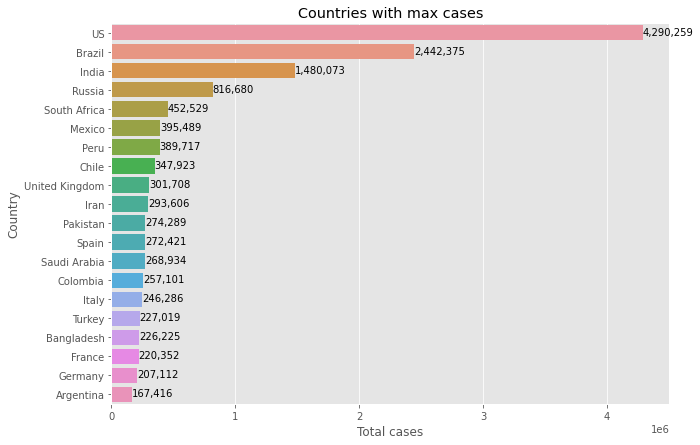

In [17]:
top = data1[data1['Date'] == data1['Date'].max()]
recents = top.groupby(by = 'Country/Region')['Confirmed'].sum().sort_values(ascending = False).head(20).reset_index()

mpl.figure(figsize= (10,7))
# mpl.xticks(fontsize = 5)
# mpl.yticks(fontsize = 5)
mpl.xlabel("Total cases")
mpl.ylabel('Country')
mpl.title("Countries with max cases")
ax = sns.barplot(x = recents.Confirmed, y = recents['Country/Region'])
for i, (value, name) in enumerate(zip(recents.Confirmed,recents['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [18]:
# predicts for future lets say, august

time_series_data = data1[['Date', 'Confirmed']].groupby('Date', as_index = False).sum()
time_series_data.columns = ['ds', 'y']
time_series_data.ds = pd.to_datetime(time_series_data.ds)


In [19]:
time_series_data.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [20]:
train_range = np.random.rand(len(time_series_data)) < 0.8
train_ts = time_series_data[train_range]
test_ts = time_series_data[~train_range]
test_ts = test_ts.set_index('ds')

In [21]:
# now, les try prophet model 

In [22]:
prophet_model = Prophet()
prophet_model.fit(train_ts)

In [23]:
future = pd.DataFrame(test_ts.index)
predict = prophet_model.predict(future)
forecast = predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast = forecast.set_index('ds')

In [24]:
prediction_fig = go.Figure() 
prediction_fig.add_trace(go.Scatter(
                x= time_series_data.ds,
                y= time_series_data.y,
                name = "true values",
                line_color= "red",
                opacity= 0.8))
prediction_fig.add_trace(go.Scatter(
                x= forecast.index,
                y= forecast.yhat,
                name = "Predicted values",
                line_color= "yellow",
                opacity= 0.8))
prediction_fig.update_layout(title_text= "Forecasting::", 
                             xaxis_title="time(months)", yaxis_title="prediction of Cases",)

prediction_fig.show()

In [25]:
prophet_model = Prophet()
prophet_model.fit(time_series_data)

future = prophet_model.make_future_dataframe(periods=150)
forecast = prophet_model.predict(future)
forecast = forecast.set_index('ds')

prediction_fig = go.Figure() 
prediction_fig.add_trace(go.Scatter(
                x= time_series_data.ds,
                y= time_series_data.y,
                name = "Actual",
                line_color= "green",
                opacity= 0.8))
prediction_fig.add_trace(go.Scatter(
                x= forecast.index,
                y= forecast.yhat,
                name = "Prediction",
                line_color= "yellow",
                opacity= 0.8))
prediction_fig.update_layout(title_text= "Forecasting", 
                             xaxis_title="time(months)", yaxis_title="prediction of cases",)

prediction_fig.show()